In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [45]:
test_results = pd.read_csv('test_results.csv')
user_table = pd.read_csv('user_table.csv')

In [46]:
# Combine tables based on user_id
combined = user_table.merge(test_results, on = 'user_id')

# Convert timestamp column to datetime format for analysis
combined['timestamp'] = pd.to_datetime(combined['timestamp'], errors='coerce')

# Drop rows with invalid timestamps
combined = combined.dropna(subset=['timestamp'])

# Unique types of Sources
'ads-google', 'ads_facebook', 'ads_other', 'direct_traffic', 'ads-bing', 'ads-yahoo' \
'seo-google',  'seo-other', 'seo_facebook', 'seo-bing', 'seo-yahoo' \
'friend_referral'

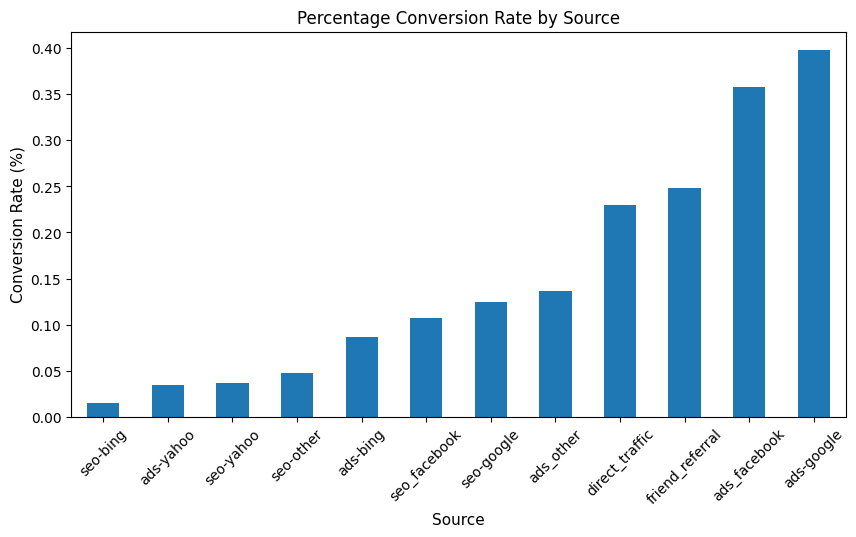

In [47]:
combined = combined.dropna()

# Calculate the conversion rate for each source
conversion_rate = combined.groupby('source')['converted'].sum()/len(combined) * 100

# Plot the conversion rate
plt.figure(figsize=(10, 5))
conversion_rate.sort_values().plot(kind='bar')
plt.title('Percentage Conversion Rate by Source')
plt.xlabel('Source', fontsize=11)
plt.ylabel('Conversion Rate (%)', fontsize=11)
plt.xticks(rotation=45)
plt.show()

In [48]:
# combined.to_csv('combined.csv', index = False)

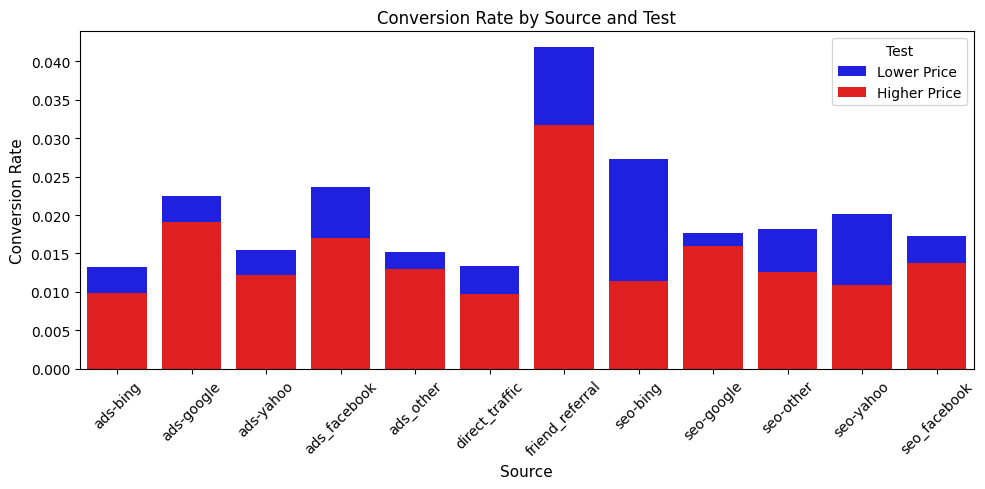

In [49]:
conversion_by_source_test = combined.groupby(['source', 'test'])['converted'].mean().unstack().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=conversion_by_source_test, x='source', y=0, label='Lower Price', color='b')
sns.barplot(data=conversion_by_source_test, x='source', y=1, label='Higher Price', color='r')
plt.title('Conversion Rate by Source and Test')
plt.ylabel('Conversion Rate', fontsize=11)
plt.xlabel('Source', fontsize=11)
plt.legend(title='Test', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

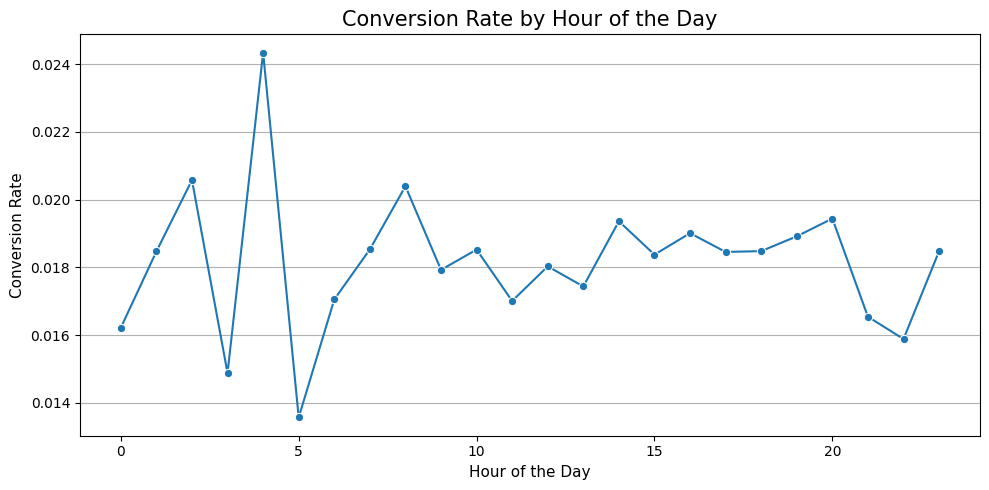

In [50]:
# Get hour from the timestamp
combined['hour'] = combined['timestamp'].dt.hour

# Conversion rate by hour
conversion_by_hour = combined.groupby('hour')['converted'].mean().reset_index()

# Plot conversion rate by hour using seaborn
plt.figure(figsize=(10, 5))
sns.lineplot(data=conversion_by_hour, x='hour', y='converted', marker='o')
plt.title('Conversion Rate by Hour of the Day', fontsize=15)
plt.ylabel('Conversion Rate', fontsize=11)
plt.xlabel('Hour of the Day', fontsize=11)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

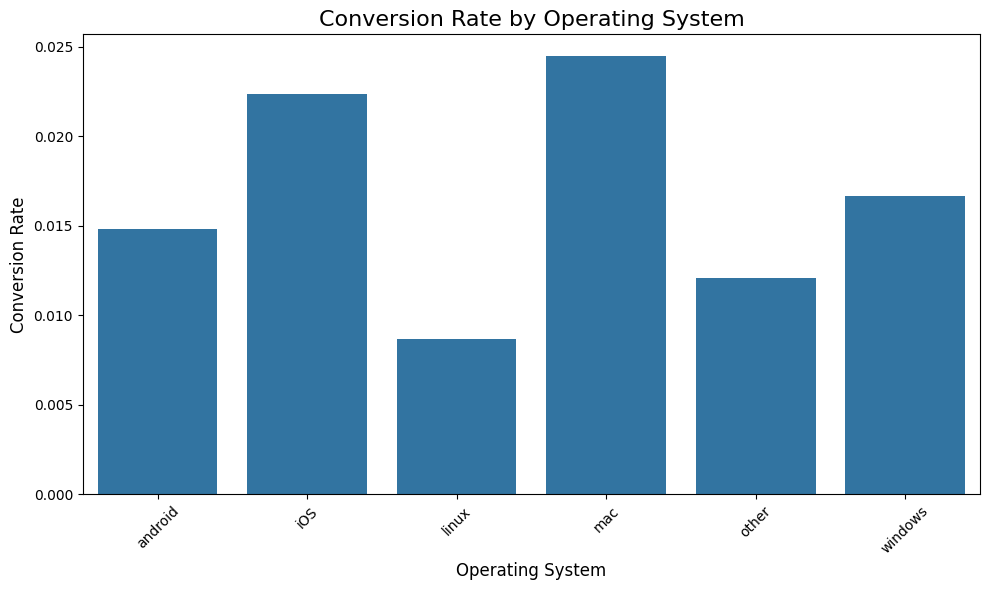

In [51]:
# Operating System Trends
conversion_by_os = combined.groupby('operative_system')['converted'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=conversion_by_os, x='operative_system', y='converted')
plt.title('Conversion Rate by Operating System', fontsize=16)
plt.ylabel('Conversion Rate', fontsize=12)
plt.xlabel('Operating System', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
